In [1]:
from matplotlib.mlab import griddata
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams

title_sz = 27
axis_sz = 22
tick_sz = 21

import numpy as np
import pylab as pl
from scipy import stats
%matplotlib inline

In [2]:
from chem_ocean.ocean_data import dataFetcher, water_column
from chem_ocean.ocean_plt import rawPlotter

# Background

## Ocean Circulation
Water travels around the globe on a circuitous conveyor belt on a roughly 1000 year time scale.  For the most part, water traverses the basins, moving from one basin to another by way of the Circumpolar Current that flows around Antarctica. However, there are a few very localized regions where water densifies abruptly and sinks, a process called, "water formation." 

In the below figure, the colored lines show water moving along trajectories of similar depth, with transitions between colors indicating water moving up or down in the water column.  Areas of water formation are highlighted by gold circles. 

![OceanCirculation-planView](https://github.com/jordanplanders/Thinkful/blob/master/Capstone%20Project/jlanders_capstone_img/windblownant.png?raw=true)

Slicing the Atlantic along 30W exposes the layered structure of the ocean.  Deep Antarctic Bottom Water (AABW) sourced from the Southern Ocean fills the abyssal ocean, while North Atlantic Deep Water (NADW) formed in the Nordic and Labrador Seas of the North Atlantic fills the deep ocean--much of the ocean interior--all the way from the North Atlantic to where the Southern Ocean some of it upwells and some feeds the Circumpolar Deep Water flowing from west to east around Antarctica. 

![OceanCirculation-planView](https://github.com/jordanplanders/Thinkful/blob/master/Capstone%20Project/jlanders_capstone_img/circulation_section.png?raw=true)

Based on measurements of wind velocity, water temeperature and salinity, and equations describing the physics of fluids moving on a sphere with given basin geometry, we have a decent understanding of how water moves. In addition the distribution of the chemical constituents of the ocean throw light on the location, size, and shape of watermasses (an body of water with similar characteristics that moves as a mass).

# Probing the Data

## Tracers

['section']
12.0
0 4


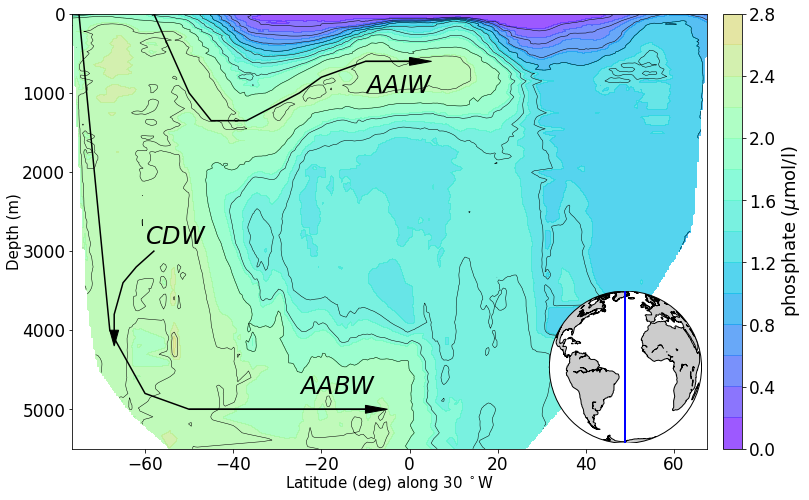

In [25]:
lineLon = -30
minLat, maxLat = -80, 80
tracer = 'phosphate'

newPlot = rawPlotter(['section'], [tracer])
fig, ax_out = newPlot.make()

dataset = dataFetcher()
dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
maxdepth_1 = max(dataset._d)

fig, ax_out[0] = newPlot.add_section(fig, ax_out[0], dataset, tracer, colorbar = 'y', share_limits =True)

ax_out[0].set_ylim([5500, 0])

ax_out[0].plot([-75,-68, -60,-50,-10], [0, 4000, 4800,5000, 5000], c = 'k') #AABW
ax_out[0].arrow(-50, 5000, 40, 0, head_width=100, head_length=5, fc='k', ec='k')
ax_out[0].text(-25, 4800, '$AABW$', color='k', size=24)

ax_out[0].plot([-58,-50,-45,-37, -25, -20, -10, 0], [0, 1000, 1350, 1350, 1000, 800, 600, 600], c = 'k') #AABW
ax_out[0].arrow(-10, 600, 10, 0, head_width=100, head_length=5, fc='k', ec='k')
ax_out[0].text(-10, 1000, '$AAIW$', color='k', size=24)

ax_out[0].plot([-58,-62,-65,-67, -67], [3000, 3200, 3400, 3800, 4000], c = 'k') #AABW
ax_out[0].arrow(-67, 4000, 0, .2, head_width=2, head_length=200, fc='k', ec='k')
ax_out[0].text(-60, 2900, '$CDW$', color='k', size=24)

### The "Eyeballing Contours" Approach

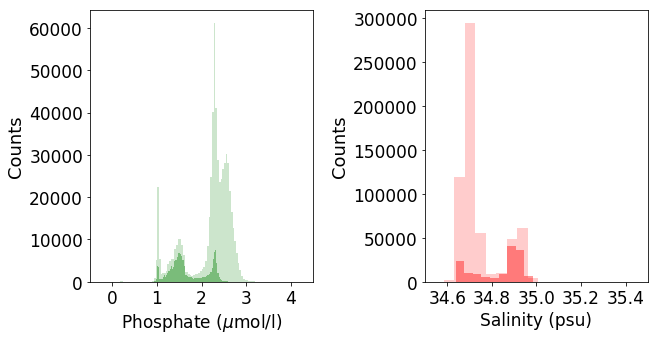

In [4]:
tracers = {'phosphate': ['Phosphate ($\mu$mol/l)', [-.5, 4.5], 'g'], 
           'salinity': ['Salinity (psu)', [34.5, 35.5], 'r'] }

_x_var = 'longitude'
_y_var = 'latitude'

fig = plt.figure(figsize = (10,5))
gs = gridspec.GridSpec(1,2, width_ratios=[1,1], wspace=0.5, hspace = 0.4) 
ax_out = []

for ik, tracer in enumerate(tracers):
    ax_out.append(fig.add_subplot(gs[ik]))
    
    _in_var_names = [tracer]
    sum_names = ['station', 'longitude', 'latitude', 'depth'] + _in_var_names
    cols = ', '.join(sum_names)

    # Atlantic Basin below 2500m
    query = 'SELECT '+ cols+' FROM woa13 WHERE depth>2500 and longitude >-70 and longitude < 15'
    dataset = dataFetcher()
    dataset.return_from_psql(query, sum_names, _in_var_names, _x_var, _y_var)
    n, bins, patches = ax_out[ik].hist(dataset._feat_data, 100, color = tracers[tracer][2], alpha = .4)

    # Global Ocean below 2500m
    query = 'SELECT '+ cols+' FROM woa13 WHERE depth>2500'
    dataset2 = dataFetcher()
    dataset2.return_from_psql(query, sum_names, _in_var_names, _x_var, _y_var)
    n, bins, patches = ax_out[ik].hist(dataset2._feat_data, 100, color =  tracers[tracer][2], alpha = .2)

    ax_out[ik].set_xlim(tracers[tracer][1])

    ax_out[ik].set_ylabel('Counts', fontsize=axis_sz-4)
    ax_out[ik].set_xlabel(tracers[tracer][0], fontsize=axis_sz-5)
                       
    xtickNames = ax_out[ik].get_xticklabels()
    ytickNames = ax_out[ik].get_yticklabels()
    
    for names in [ytickNames, xtickNames]:
        plt.setp(names, rotation=0, fontsize=tick_sz-4)


### Deep Ocean Tracer Distributions
Atlantic basin below 2,500 m (dark), global ocean below 2,500 m (light)

# Analytical Investigations

## Q1: NADW and AABW, statistically different?

phosphate
	 3000 -167.268949049 2.66283833081e-219
	 3500 -75.3757678996 6.82738100016e-73
	 4000 -22.2649946327 1.8625828055e-15
	 4500 nan nan
	 5000 nan nan
	 5500 nan nan
salinity
	 3000 168.975628582 1.7033218313e-176
	 3500 246.211427833 2.7741844131e-125
	 4000 299.712757958 2.31425147662e-42
	 4500 nan nan
	 5000 nan nan
	 5500 nan nan
temperature
	 3000 97.6257581701 2.16034546348e-184
	 3500 189.868326396 8.74118490401e-240
	 4000 66.3901003223 1.49892883161e-25
	 4500 nan nan
	 5000 nan nan
	 5500 nan nan


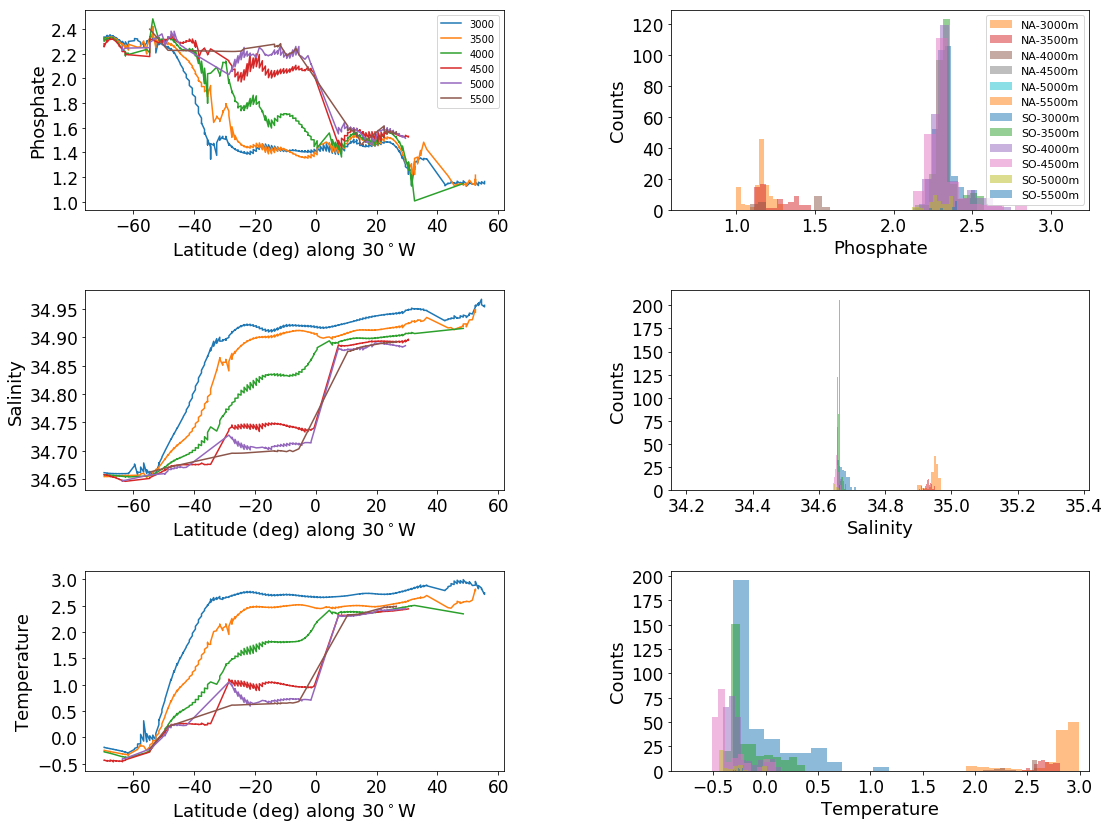

In [5]:
tracers = ['phosphate', 'salinity', 'temperature']
lineLon = -30
minLat, maxLat = -70, 80

fig = plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(len(tracers),2, width_ratios=[1,1], wspace=0.4, hspace = 0.4) 
ax_out = []
for ik in range(len(tracers)*2):
    ax_out.append(fig.add_subplot(gs[ik]))

for ik, tracer in enumerate(tracers):
    print(tracer)
    dataset_NA = dataFetcher()
    dataset_NA.return_from_psql('SELECT latitude, longitude, depth, {} from woa13 WHERE latitude <70 and latitude > 50 and longitude < -20 and longitude >-40 order by depth'.format(tracer),['latitude', 'longitude', 'depth', tracer], [tracer], 'longitude', 'latitude')

    NAtl_60 = water_column(dataset_NA, 'column')

    dataset_SA = dataFetcher()
    dataset_SA.return_from_psql('SELECT latitude, longitude, depth, {} from woa13 WHERE latitude <-50 and latitude > -70 and longitude < -20 and longitude >-40 order by depth'.format(tracer),['latitude', 'longitude', 'depth', tracer], [tracer], 'longitude', 'latitude')

    SAtl_60 = water_column(dataset_SA, 'column')
        
    section_dataset = dataFetcher()
    section_dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])

    depths = [3000, 3500, 4000, 4500, 5000, 5500]
    for depth in depths:
        data_NA = dataset_NA._feat_data[dataset_NA._d==depth]
        data_SA = dataset_SA._feat_data[dataset_SA._d==depth]
        ax_out[2*ik+1].hist(data_SA, label = 'SO-'+ str(depth)+'m', alpha=.5)
        ax_out[2*ik+1].hist(data_NA, label = 'NA-'+ str(depth)+'m', alpha = .5)
        ax_out[2*ik+1].set_ylabel('Counts', fontsize=axis_sz-4)
        ax_out[2*ik+1].set_xlabel(tracer.title(), fontsize=axis_sz-4)
        
        t2, p2 = stats.ttest_ind(data_NA,data_SA, equal_var=False)
        print('\t',depth, t2, p2)
        
        ax_out[2*ik].plot(section_dataset._x[section_dataset._d==depth], section_dataset._feat_data[section_dataset._d==depth], label=str(depth))
        
        ax_out[2*ik].set_ylabel(tracer.title(), fontsize=axis_sz-4)
        ax_out[2*ik].set_xlabel('Latitude (deg) along {}$^\circ$W'.format(-lineLon), fontsize=axis_sz-4)
        try:
            ax_out[2*ik+1].set_xlim([min([min(data_NA), min(data_SA)])-.5, max([max(data_NA), max(data_SA)])+.5])
        except:
            continue
    if ik == 0:
        handles, labels = ax_out[2*ik+1].get_legend_handles_labels()
        
        # sort both labels and handles by labels
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
        ax_out[2*ik+1].legend(handles, labels)
        ax_out[2*ik].legend(prop={'size': 10})
        

    # set tick parameters
    for ij in [2*ik, 2*ik+1]:
        xtickNames = ax_out[ij].get_xticklabels()
        ytickNames = ax_out[ij].get_yticklabels()

        for names in [ytickNames, xtickNames]:
            plt.setp(names, rotation=0, fontsize=tick_sz-4)


## Q2: How far does Southern Ocean source water extend?

### Two End-member Mixing Model

![TwoEndmemberMixingCartoon](https://github.com/jordanplanders/Thinkful/blob/master/Capstone%20Project/jlanders_capstone_img/two_endmember_cartoon.png?raw=true)

### Applying the two end-member mixing model to the Atlantic

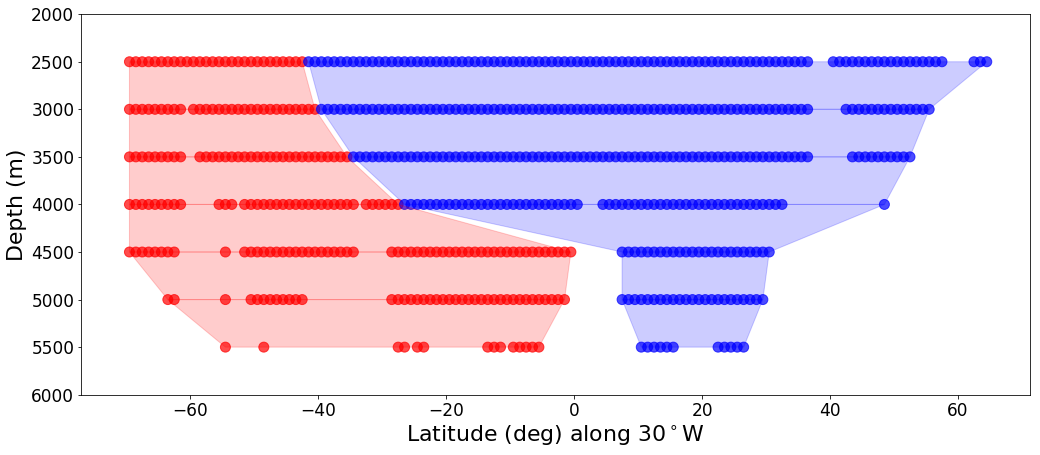

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17, 7), facecolor='w')

tracer = 'salinity'
dataset = dataFetcher()
dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])

depths = [2500, 3000, 3500, 4000, 4500, 5000, 5500]
r = []
b = []
d_traj = {}

for ij, dpth in enumerate(depths):
    Atl = water_column(dataset, 'traj', depth= dpth)
    Atl.get_mixing_labels('two_endmember')
    d_traj[dpth] = Atl
    ax.scatter(Atl._ax_avgd, [dpth for ik in range(len(Atl._feat_data_avgd))], c = Atl.mixing_labels, alpha = .7, s=100)
    ax.set_ylim([6000,2000])
    
    # create lists of latitudes where there are red points and blue points
    x_int_r = []
    x_int_b = []
    for ik in range(len(Atl._feat_data_avgd)):
        if Atl.mixing_labels[ik] == 'r':
            x_int_r.append(Atl._ax_avgd[ik])
        else:
            x_int_b.append(Atl._ax_avgd[ik])
    
    # create lists of bounding points for each depth
    r.append([dpth, x_int_r[0], x_int_r[-1]])
    b.append([dpth, x_int_b[0], x_int_b[-1]])

### fill code
r_pairs = [[r[n-1], r[n]] for n in range(1,len(r))]
b_pairs = [[b[n-1], b[n]] for n in range(1,len(b))]

pair_sets = {'r':[r_pairs, []], 'b':[b_pairs,[]]}

for color in pair_sets.keys():
    for pair in pair_sets[color][0]:
        ul = [pair[0][1], pair[0][0]]
        ur = [pair[0][2], pair[0][0]]
        ll = [pair[1][1], pair[1][0]]
        lr = [pair[1][2], pair[1][0]]
        
        xs = [ik[0] for ik in [ll, ul, ur, lr]]
        ys = [ik[1] for ik in [ll, ul, ur, lr]]
        
        pair_sets[color][1].append([xs, ys])
        
    for d in pair_sets[color][1]:
        ax.fill(d[0],d[1], c=color, alpha=.2)
    
ax.set_ylim([6000, 2000])

ax.set_ylabel('Depth (m)', fontsize=axis_sz)
ax.set_xlabel('Latitude (deg) along {}$^\circ$W'.format(-lineLon), fontsize=axis_sz)

# set tick parameters
xtickNames = ax.get_xticklabels()
ytickNames = ax.get_yticklabels()
    
for names in [ytickNames, xtickNames]:
    plt.setp(names, rotation=0, fontsize=tick_sz-4)    


## Q3: Can we trace water formation statistically?

### Connectedness using t-test

![ConnectednessCartoon](https://github.com/jordanplanders/Thinkful/blob/master/Capstone%20Project/jlanders_capstone_img/connectedness_cartoon.png?raw=true)

### Applying connectedness to the Atlantic Ocean

In [7]:
class minisection:
    ''' 
    outputs a minisection with all tracer data over a short trajectory at each specified depth. 
    depths are determined by the d_traj
    '''
    
    def __init__(self, d_traj, nlat, slat):
        self.depth_bins = d_traj.keys()
        self.nlat = nlat
        self.slat = slat
        self.d = {}
        for depth in self.depth_bins:
            self.d[depth] =d_traj[depth]._feat_data[(d_traj[depth]._x<=nlat)&(d_traj[depth]._x>slat) ] # pull averaged feature data from some depth that is 
#             self.d[depth] =d_traj[depth]._feat_data_avgd[(d_traj[depth]._ax_avgd<nlat) &(d_traj[depth]._ax_avgd>slat) ] # pull averaged feature data from some depth that is 

In [8]:
class paths:
    
    def __init__(self, connectivity_window, minisections, pthresh1, pthresh2):
        
        self.window = connectivity_window
        self.pthresh1 = pthresh1
        self.pthresh2 = pthresh2
        self.d_paths = {}
        
        for ik in range(len(minisections)-1):
            mini_sec1 = minisections[ik]
            mini_sec2 = minisections[ik+1]
            for depth1 in mini_sec1.depth_bins:
                self.d_paths[(mini_sec1.slat,depth1)]= []
                # check for directly vertical connectedness
                try:
                    # todo: should be next bin, not 500m bin because not all bins are 500m
                    t, p = stats.ttest_ind(mini_sec1.d[depth1+500],mini_sec1.d[depth1], equal_var=False) #down
                    if p>self.pthresh1:
                        if p>self.pthresh2:
                            self.d_paths[(mini_sec1.slat,depth1)].append((mini_sec1.slat,depth1+500, p))
                        else:
                            self.d_paths[(mini_sec1.slat,depth1)].append((mini_sec1.slat,depth1+500, p))
                except:
                    continue
                    
                # check for horizontal, diagonal up, diagonal down connectedness
                for depth2 in mini_sec2.depth_bins:
                    if (depth2 <= depth1+self.window) and (depth2 >= depth1-self.window): #horizontal, up diagonal, down diagonal
                        t, p = stats.ttest_ind(mini_sec2.d[depth2],mini_sec1.d[depth1], equal_var=False)
                        if p>self.pthresh1:
                            if p>self.pthresh2:
                                self.d_paths[(mini_sec1.slat,depth1)].append((mini_sec2.slat,depth2, p))
                            else:
                                self.d_paths[(mini_sec1.slat,depth1)].append((mini_sec2.slat,depth2, p))


In [9]:
lat_bins = [(x, x+3) for x in range(-80,80, 4)]
depths = [x for x in range(0,6500, 250)]

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


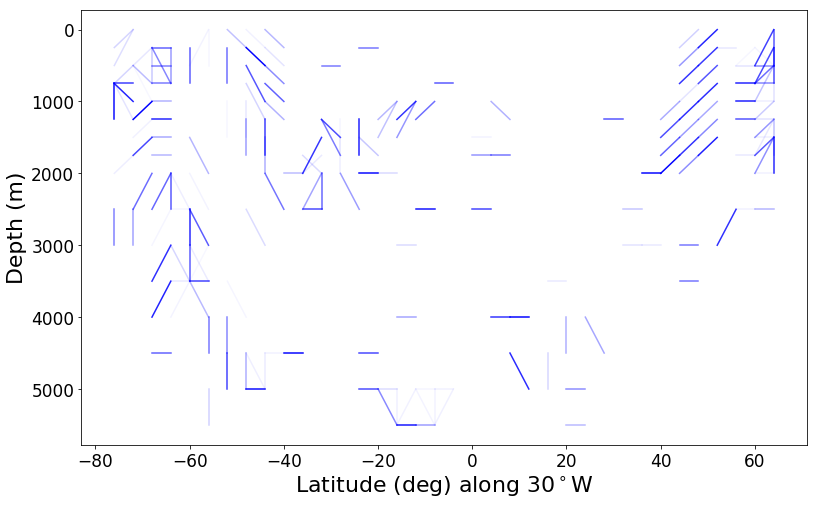

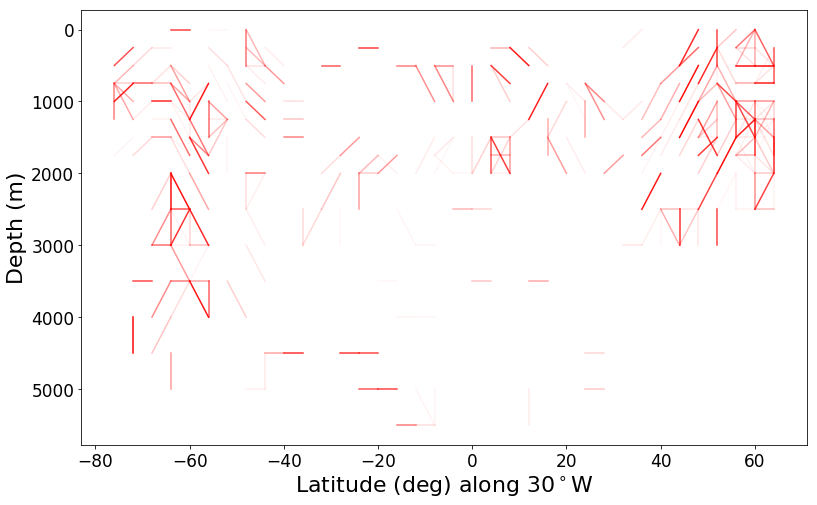

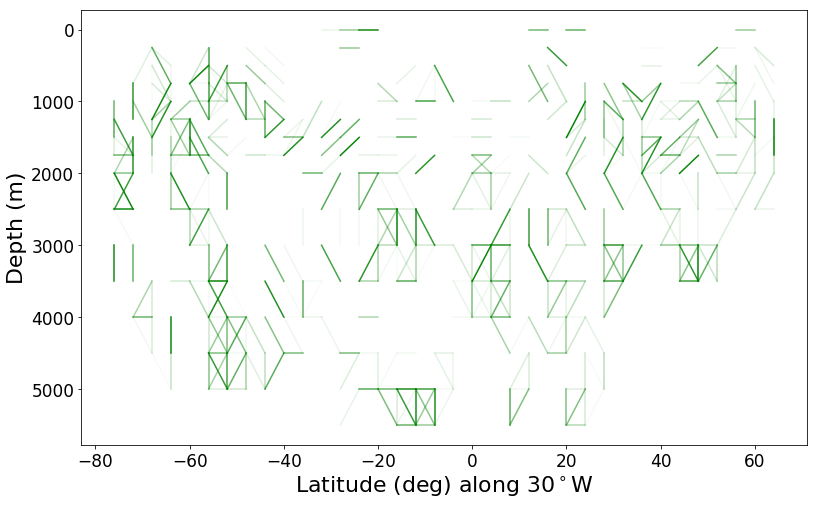

In [10]:
lineLon = -30
minLat, maxLat = -80, 80
# fig = plt.figure(figsize = (13, 8)) 
# ax = fig.add_subplot(111)
tracer_d = {'temperature':'blue', 'salinity': 'red', 'phosphate': 'green'}

for tracer in tracer_d.keys():
    dataset = dataFetcher()
    dataset.get_section('NS_section', lineLon, [minLat, maxLat], [tracer])
    
    d_traj = {}
    # standardize the depths of interest between locations
    for dpth in depths:
        Atl = water_column(dataset, 'traj', depth= dpth) 
        d_traj[dpth] = Atl

    # create sections that are 3 deg x 3 deg and however deep data is available
    minisections = []
    for (slat, nlat) in lat_bins:
        minisections.append(minisection(d_traj, nlat, slat)) #

    # calculate connectedness between section depths (vertical, horizontal, diagonal)
    Atl_paths = paths(500, minisections, .01, .05) # window for diagonal, sections list, p values
    
    fig = plt.figure(figsize = (13, 8)) 
    ax = fig.add_subplot(111)
    for key in Atl_paths.d_paths.keys():
        values = Atl_paths.d_paths[key]
        for value in values:
            ax.plot([key[0], value[0]],[key[1], value[1]], c = tracer_d[tracer] ,alpha = 1-(1-3*value[2]) )
    ax.set_ylabel('Depth (m)', fontsize=axis_sz)
    ax.set_xlabel('Latitude (deg) along {}$^\circ$W'.format(-lineLon), fontsize=axis_sz)

    # set tick parameters
    xtickNames = ax.get_xticklabels()
    ytickNames = ax.get_yticklabels()
    
    for names in [ytickNames, xtickNames]:
        plt.setp(names, rotation=0, fontsize=tick_sz-4)
#     ax.set_title(tracer)
    plt.gca().invert_yaxis()